# Exercice 1

Estos dos problemas de lógica toman como entrada dos valores binarios (por ejemplo, 0 o 1), y devuelven una única salida binaria.


Para el problema "XOR", la tabla de verdad es:

| x1 | x2 | XOR |
|----|----|-----|
|  0 |  0 |  0  |
|  0 |  1 |  1  |
|  1 |  0 |  1  |
|  1 |  1 |  0  |          

Para el problema "AND ", la tabla de verdad es:

| x1 | x2 | AND |
|----|----|-----|
|  0 |  0 |  0  |
|  0 |  1 |  0  |
|  1 |  0 |  0  |
|  1 |  1 |  1  |


El perceptron toma dos valores x1 y x2 , un bias b y su salida es f(z) donde 
$$
z = x_1 \cdot w_1 + x_2 \cdot w_2 + b
$$
$$
f(z) = 
\begin{cases}
1, & \text{si } z \geq 0\\
0, & \text{si } z < 0
\end{cases}
$$

Se define de manera muy sencilla en python :


In [10]:
import numpy as np

def f(z):
    return 1 if z >= 0 else 0

# x y son vectores y np.dot nos permite hacer el producto escalar
def perceptronModel(x, w, b):
    z = np.dot(w, x) + b
    y = f(z)
    return y

Ahora tenemos que implementar un algoritmo para aprender al perceptron dar la buena repuesta con la data que le damos. Es decir encontrar los valores de w1 , w2 y b por cuales el peceptron siempre dara la buena repuesta. 

Found weights: w1 = 0.10, w2 = 0.20
Found bias: b = -0.20
Testing the model with AND logic training data:
Input: [0 1], Expected: 0, Prediction: 0
Input: [1 1], Expected: 1, Prediction: 1
Input: [0 0], Expected: 0, Prediction: 0
Input: [1 0], Expected: 0, Prediction: 0


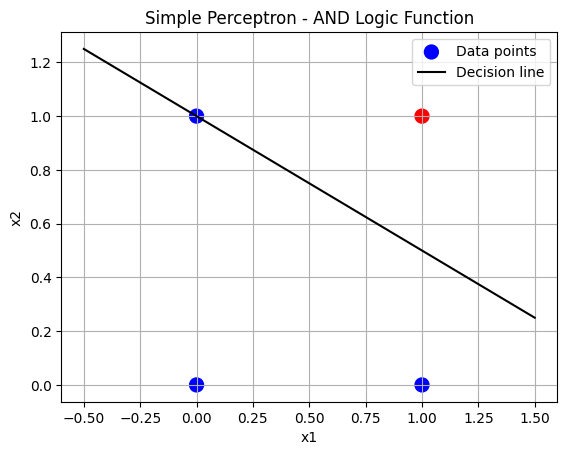

In [11]:
import matplotlib.pyplot as plt


# Training loop
def perceptronSimple_algo(x, y, num_iterations, weights, bias, learning_rate, epsilon):
    i = 0
    min_error = 9999999999999999999999999999999999999999
    while (i < num_iterations) & (min_error > epsilon):
        i = i+1
        for xi, yi in zip(x, y):
            prediction = perceptronModel(xi, weights, bias)
            error = yi - prediction

            weights += learning_rate * error * xi
            bias += learning_rate * error

    # Return the weights and bias as a dictionary
    result = {
        "weights": weights,
        "bias": bias
    }
    return result

# Data for training (AND logic function)
x = np.array([
    [0, 1],  # Input 1
    [1, 1],  # Input 2
    [0, 0],  # Input 3
    [1, 0]   # Input 4
])

y = np.array([0, 1, 0, 0])  # Expected outputs for AND logic

# Initial weights and bias
w = np.array([0.0, 0.0])  # Initialize weights


weights = np.array([0.0, 0.0])  # Initial weights
bias = 0.0  # Initial bias
learning_rate = 0.1
num_iterations = 10

# Train the perceptron
result = perceptronSimple_algo(x, y, num_iterations, weights, bias, learning_rate,0.1)

print(f"Found weights: w1 = {result['weights'][0]:.2f}, w2 = {result['weights'][1]:.2f}")

print("Found bias: b = {:.2f}".format(result["bias"]))

print("Testing the model with AND logic training data:")
for xi, yi in zip(x, y):
    prediction = perceptronModel(xi, result["weights"], result["bias"])
    print(f"Input: {xi}, Expected: {yi}, Prediction: {prediction}")


# Plot the data points for the AND problem
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=100, label='Data points')

# Plot the decision line
x1_vals = np.array([-0.5, 1.5])  # Range of values for the x1 axis
x2_vals = -(result["weights"][0] * x1_vals + result["bias"]) / result["weights"][1]  # Compute the decision line
plt.plot(x1_vals, x2_vals, 'k-', label='Decision line')

# Chart parameters
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Simple Perceptron - AND Logic Function')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



Found weights: w1 = 0.00, w2 = -0.10
Found bias: b = 0.00
Testing the model with XOR logic training data:
Input: [0 1], Expected: 1, Prediction: 0
Input: [1 1], Expected: 0, Prediction: 0
Input: [0 0], Expected: 0, Prediction: 1
Input: [1 0], Expected: 1, Prediction: 1


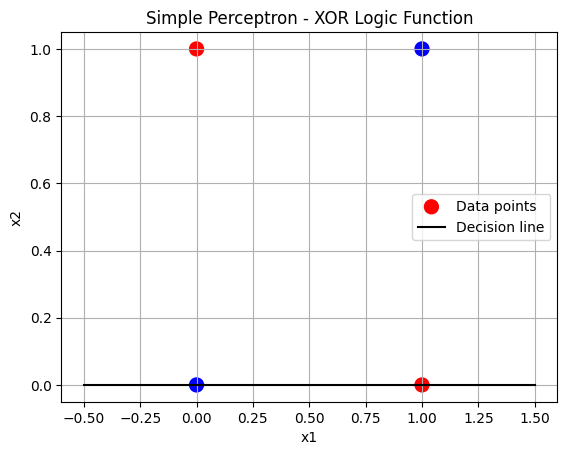

In [12]:

## XOR Function ##
# Data for training 
x = np.array([
    [0, 1],  # Input 1
    [1, 1],  # Input 2
    [0, 0],  # Input 3
    [1, 0]   # Input 4
])
y = np.array([1, 0, 0, 1])  # Expected outplus

weights = np.array([0.0, 0.0])  # Initial weights
bias = 0.0  # Initial bias
learning_rate = 0.1
num_iterations = 10


result = perceptronSimple_algo(x, y, num_iterations, weights, bias, learning_rate,0.1)

print("Found weights: w1 = {:.2f}, w2 = {:.2f}".format(result["weights"][0], result["weights"][1]))
print("Found bias: b = {:.2f}".format(result["bias"]))


# Test the model with training data
print("Testing the model with XOR logic training data:")
for xi, yi in zip(x, y):
    prediction = perceptronModel(xi, result["weights"], result["bias"])
    print(f"Input: {xi}, Expected: {yi}, Prediction: {prediction}")


plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=100, label='Data points')

x1_vals = np.array([-0.5, 1.5])  
x2_vals = -(result["weights"][0] * x1_vals + result["bias"]) / result["weights"][1]  # Calcule la ligne de séparation
plt.plot(x1_vals, x2_vals, 'k-', label='Decision line')

#
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Simple Perceptron - XOR Logic Function')
plt.legend()
plt.grid(True)


plt.show()

En el gráfico de los puntos XOR, no es posible encontrar una línea recta que los separe correctamente. Esto se debe a que el problema XOR no es linealmente separable. Como resultado, un perceptrón simple no puede resolver este tipo de problema, ya que solo puede trabajar con problemas donde los datos pueden ser divididos por una línea recta. Se requieren modelos más complejos, como redes neuronales multicapa, para resolver el problema XOR.